In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
path = '/content/drive/MyDrive/Colab Notebooks/epcgd'
# os.mkdir(path) to be commented cause it has already been created

list(os.listdir(path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['primeiro_trabalho.ipynb', 'first_assignment', 'tf_students.ipynb']

#Preprocessing

In [4]:
import tensorflow as tf
import keras

from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# Set the base path to the dataset folder
base_path = Path("/content/drive/MyDrive/Colab Notebooks/epcgd/first_assignment")

# Specify the path to the dataset folder
dataset_path = base_path / "archive"

# Check if the specified folders exist
if not dataset_path.exists():
    raise FileNotFoundError(f"The dataset folder '{dataset_path}' does not exist.")

# Set the image size
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Create an ImageDataGenerator for data preprocessing and augmentation
#datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Specify the target image size
target_size = (IMG_HEIGHT, IMG_WIDTH)  # Adjust based on your model's input size requirements

In [6]:
# Create a tf.data.Dataset for the training set
train_data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=0.2,#0.2
    subset="training",
    seed=1337  # for reproducibility
)

# Create a tf.data.Dataset for the validation set
val_data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size= BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=1337  # for reproducibility
)

Found 1655 files belonging to 6 classes.
Using 1324 files for training.
Found 1655 files belonging to 6 classes.
Using 331 files for validation.


In [7]:
# Print the shape of a batch from the training dataset
for images, labels in train_data.take(1):
    print("Training Batch Shape - Images:", images.shape, "Labels:", labels.shape)

# Print the shape of a batch from the validation dataset
for images, labels in val_data.take(1):
    print("Validation Batch Shape - Images:", images.shape, "Labels:", labels.shape)

Training Batch Shape - Images: (32, 150, 150, 3) Labels: (32, 6)
Validation Batch Shape - Images: (32, 150, 150, 3) Labels: (32, 6)


#Plotting the dataset

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
class_names = train_data.class_names
print(class_names)

['fresh_peaches_done', 'fresh_pomegranates_done', 'fresh_strawberries_done', 'rotten_peaches_done', 'rotten_pomegranates_done', 'rotten_strawberries_done']


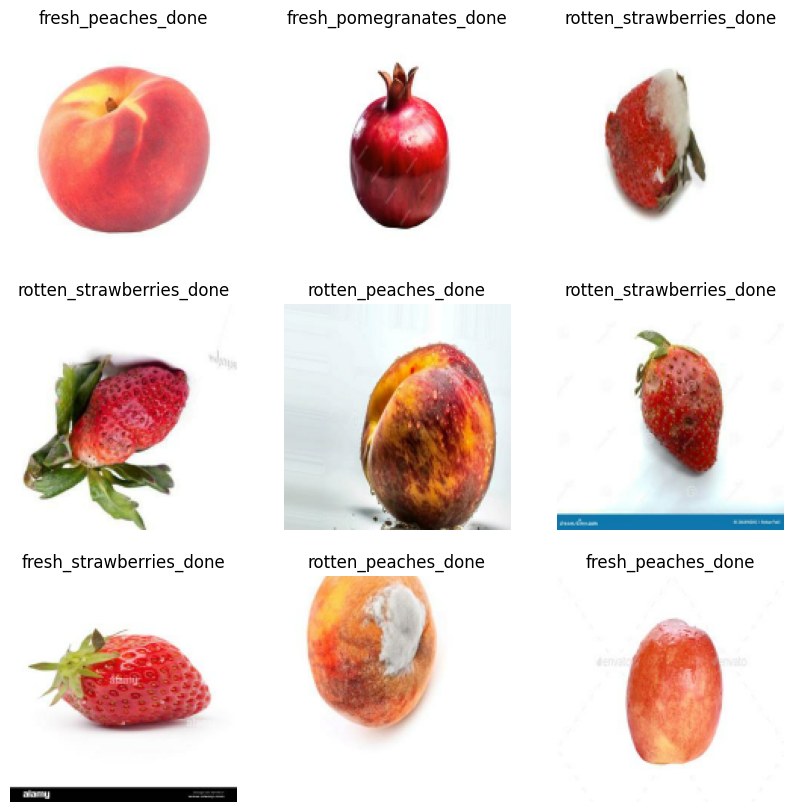

In [10]:
# Assuming you have 'train_data' and 'labels' variables from your project
plt.figure(1, figsize=(10, 10))

# Loop over the first batch of the training dataset
for x_batch, y_batch in train_data.take(1):
    # Loop over the first 9 images in the batch
    for i in range(9):
        # Create a subplot in a 3x3 grid
        ax = plt.subplot(3, 3, i + 1)

        # Display the image (convert to uint8 for proper display)
        plt.imshow(x_batch[i].numpy().astype("uint8"))

        # Set the title of the subplot with the corresponding label
        plt.title(class_names[np.argmax(y_batch[i, :])])

        # Turn off axis labels for cleaner display
        plt.axis("off")

# Show the plot
plt.show()

#Visualizing training and validation performance metrics (accuracy and loss) of a neural network over epochs


In [11]:
def plot_performance(history, epochs, interval):
    # Create a 1x2 subplot layout
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Set the title for the entire figure
    t = f.suptitle('Basic CNN Performance', fontsize=12)

    # Adjust the spacing between subplots
    f.subplots_adjust(top=0.85, wspace=0.3)

    # Generate a list of epoch numbers
    epoch_list = list(range(1, epochs + 1))

    # Plot training and validation accuracy
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs + 1, interval))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    # Plot training and validation loss
    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs + 1, interval))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

#Dividing labels from images

In [12]:
def separate_images_labels(dataset):
    images = []  # List to store image batches
    labels = []  # List to store label batches

    # Iterate through the batches in the dataset
    for image_batch, label_batch in dataset:
        # Extend the 'images' and 'labels' lists with the current batch
        images.extend(image_batch.numpy())
        labels.extend(label_batch.numpy())

    # Convert the lists to NumPy arrays
    return np.array(images), np.array(labels)

# Separating images and labels for training data
train_images, train_labels = separate_images_labels(train_data)

# Separating images and labels for validation data
val_images, val_labels = separate_images_labels(val_data)


#Visualize each pixel of the images and rescaling it with the normalization

In [13]:
# Function to visualize pixel values of an image
def visualize_pixel_values(image, label):
    # Print the pixel values as a NumPy array
    print("Pixel Values:")
    print(image)

# Visualize pixel values of the first image in the training dataset
for images, labels in train_data.take(1):
    visualize_pixel_values(images[0].numpy(), labels[0].numpy())

Pixel Values:
[[[255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]
  ...
  [255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]]

 [[255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]
  ...
  [255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]]

 [[255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]
  ...
  [255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]]

 ...

 [[250.5 250.5 248.5]
  [250.  250.  248. ]
  [249.  249.  247. ]
  ...
  [252.  252.  250. ]
  [253.  253.  251. ]
  [253.  253.  251. ]]

 [[251.  251.  249. ]
  [251.  251.  249. ]
  [251.  251.  249. ]
  ...
  [252.  252.  250. ]
  [253.  253.  251. ]
  [253.  253.  251. ]]

 [[251.  251.  249. ]
  [251.  251.  249. ]
  [251.  251.  249. ]
  ...
  [252.  252.  250. ]
  [253.  253.  251. ]
  [253.  253.  251. ]]]


In [14]:
# Apply rescaling within the dataset using map
train_data = train_data.map(lambda x, y: (x / 255.0, y))
# Apply rescaling within the dataset using map
val_data = val_data.map(lambda x, y: (x / 255.0, y))

Pixel Values:
[[[0.69215685 0.69215685 0.69215685]
  [0.69411767 0.69411767 0.69411767]
  [0.69803923 0.69803923 0.69803923]
  ...
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]]

 [[0.69215685 0.69215685 0.69215685]
  [0.69411767 0.69411767 0.69411767]
  [0.69803923 0.69803923 0.69803923]
  ...
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]]

 [[0.69215685 0.69215685 0.69215685]
  [0.69411767 0.69411767 0.69411767]
  [0.69803923 0.69803923 0.69803923]
  ...
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]]

 ...

 [[0.7607843  0.7607843  0.7607843 ]
  [0.76666665 0.76666665 0.76666665]
  [0.7705882  0.7705882  0.7705882 ]
  ...
  [0.6284314  0.6284314  0.6284314 ]
  [0.62941176 0.62941176 0.62941176]
  [0.6313726  0.6313726  0.6313726 ]]

 [[0.75490195 0.75490195 0.75490195]
  [0.7588235  0.7588235

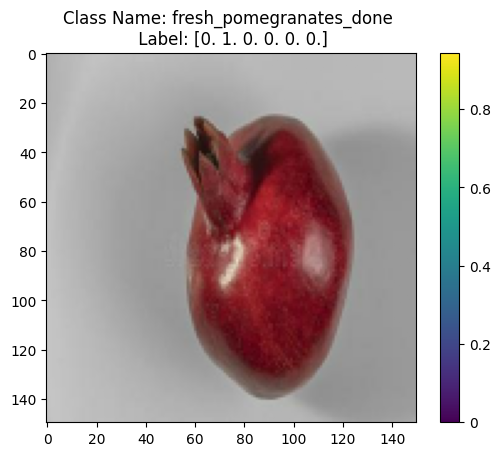

In [15]:
# Function to visualize pixel values of an image
def visualize_pixel_values(image, label):
    # Print the pixel values as a NumPy array
    print("Pixel Values:")
    print(image)

    # Display the image with a colorbar
    plt.imshow(image)

    # Convert the label to the corresponding class name
    class_name = class_names[np.argmax(label)]

    #plt.title(f"Label: {label}")
    plt.title(f"Class Name: {class_name} \n Label: {label}")
    plt.colorbar(format="%g")  # Add a colorbar with pixel values
    plt.show()

# Visualize pixel values of the first image in the training dataset
for images, labels in train_data.take(1):
    visualize_pixel_values(images[0].numpy(), labels[0].numpy())


#:

In [16]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=2)

In [17]:
batch_size = 32
epochs = 5
input_shape = (150, 150, 3)

In [18]:
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Rescaling

In [ ]:
# Define model architecture
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes for fruits


# Print model summary
model.summary()

In [21]:
model.compile(#loss='mean_squared_error',
              loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              #optimizer=tf.keras.optimizers.legacy.RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images,train_labels,
                    validation_data=(val_images, val_labels),
                    batch_size=batch_size,
                    epochs= epochs,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/5
42/42 [==============================] - 81s 2s/step - loss: 1.8446 - accuracy: 0.2258 - val_loss: 1.9230 - val_accuracy: 0.1934
Epoch 2/5
42/42 [==============================] - 77s 2s/step - loss: 1.8065 - accuracy: 0.2319 - val_loss: 1.8979 - val_accuracy: 0.1903
Epoch 3/5
42/42 [==============================] - 74s 2s/step - loss: 1.8090 - accuracy: 0.2334 - val_loss: 1.9853 - val_accuracy: 0.1873
Epoch 4/5
42/42 [==============================] - 74s 2s/step - loss: 1.7277 - accuracy: 0.2402 - val_loss: 1.9265 - val_accuracy: 0.1843
Epoch 4: early stopping
